In [1]:
library(car)
library(agricolae)

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

In [2]:
a=file.choose()
b=read.table(a,header=T)

In [3]:
s1=b[1:4,1]
s2=b[5:8,1]
s3=b[9:13,1]
s4=b[14:17,1]

In [4]:
mean(s1);sd(s1)
mean(s2);sd(s2)
mean(s3);sd(s3)
mean(s4);sd(s4)

[1] 13.8

[1] 0.4082483

[1] 13.1

[1] 0.5944185

[1] 17.14

[1] 0.598331

[1] 18.1

[1] 0.6480741

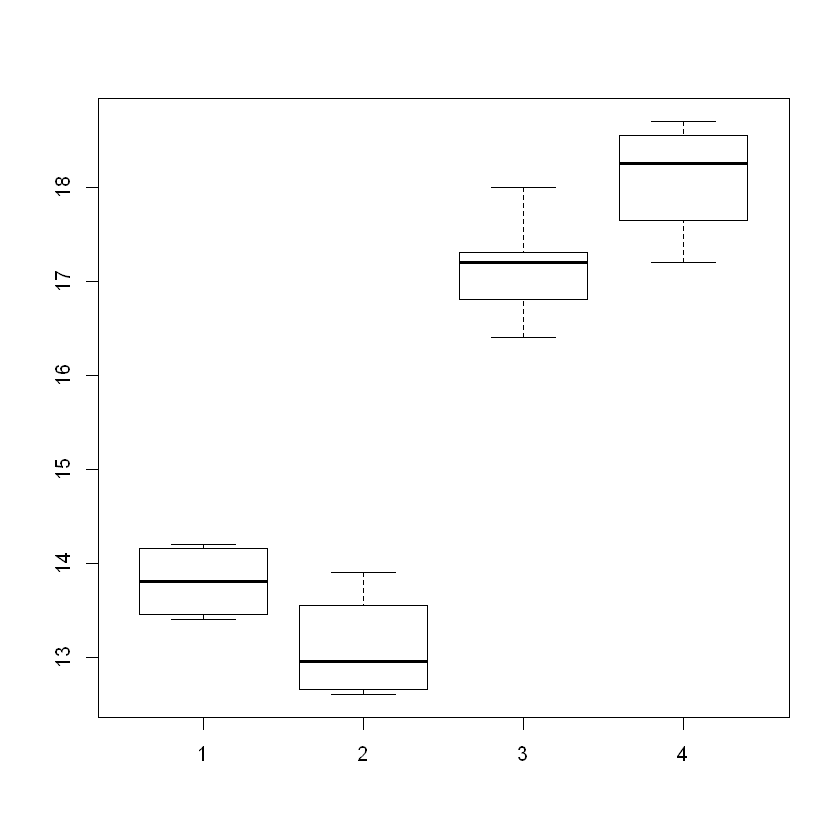

In [5]:
boxplot(s1, s2, s3, s4)


	Shapiro-Wilk normality test

data:  s1
W = 0.84399, p-value = 0.2073


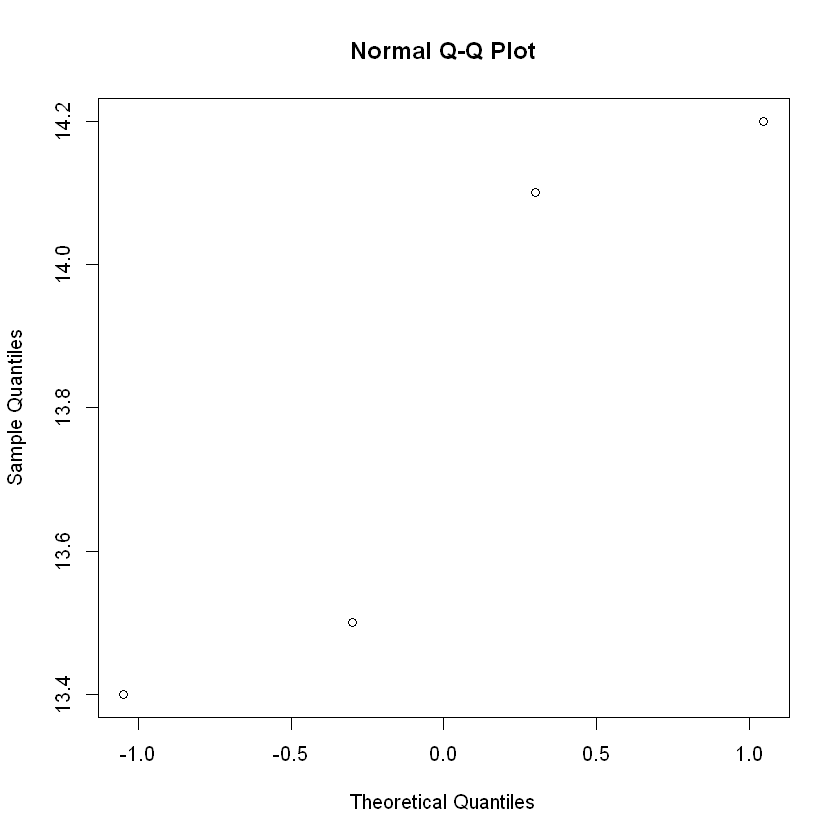


	Shapiro-Wilk normality test

data:  s2
W = 0.89978, p-value = 0.43


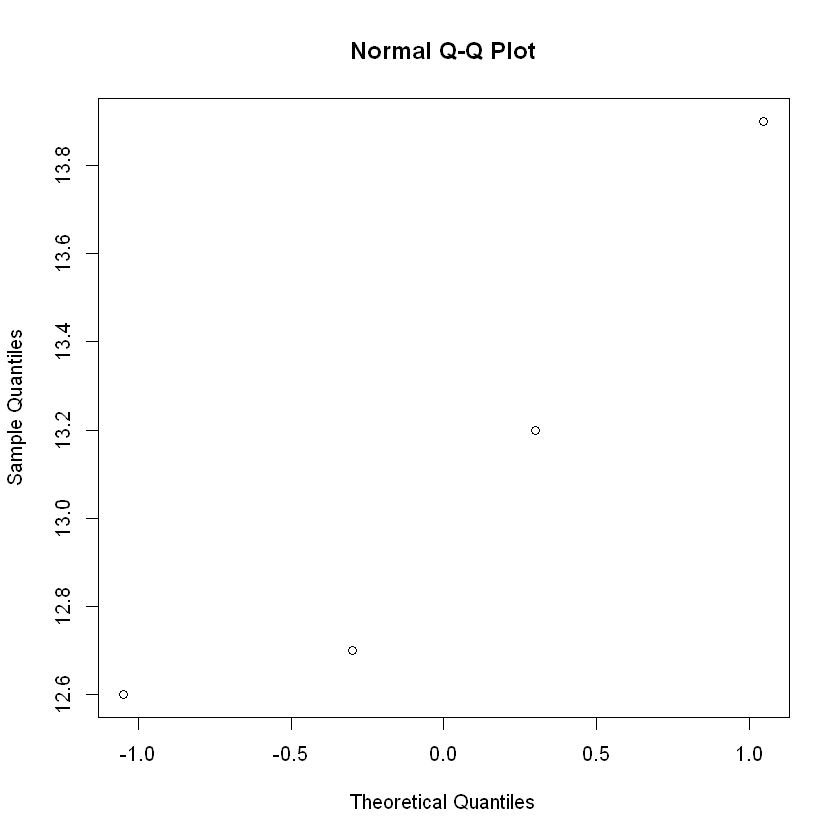


	Shapiro-Wilk normality test

data:  s3
W = 0.97912, p-value = 0.9299


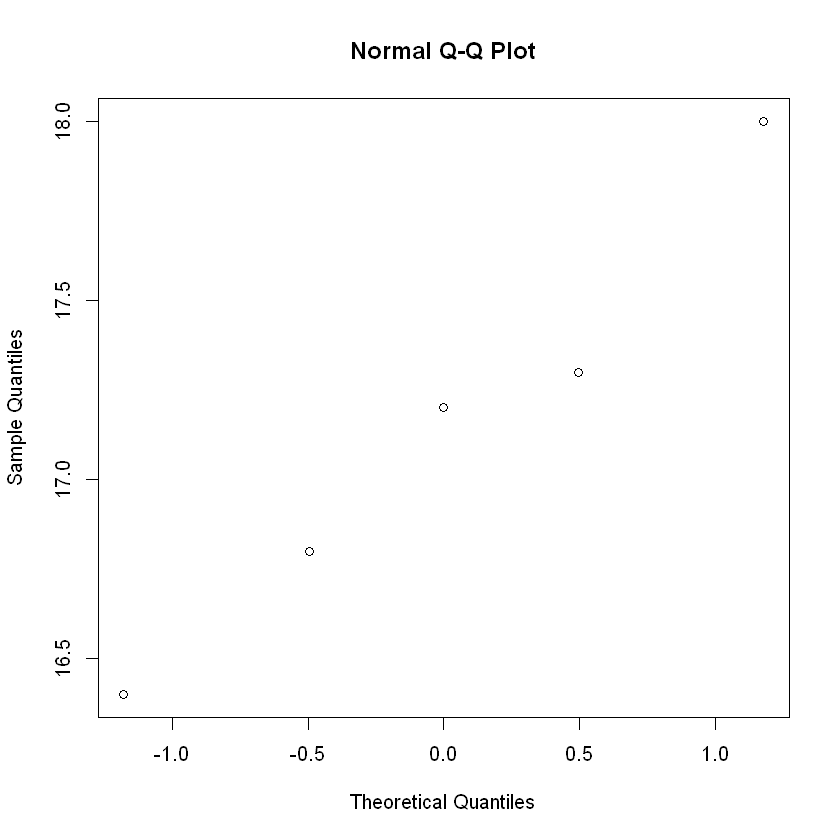


	Shapiro-Wilk normality test

data:  s4
W = 0.92708, p-value = 0.5774


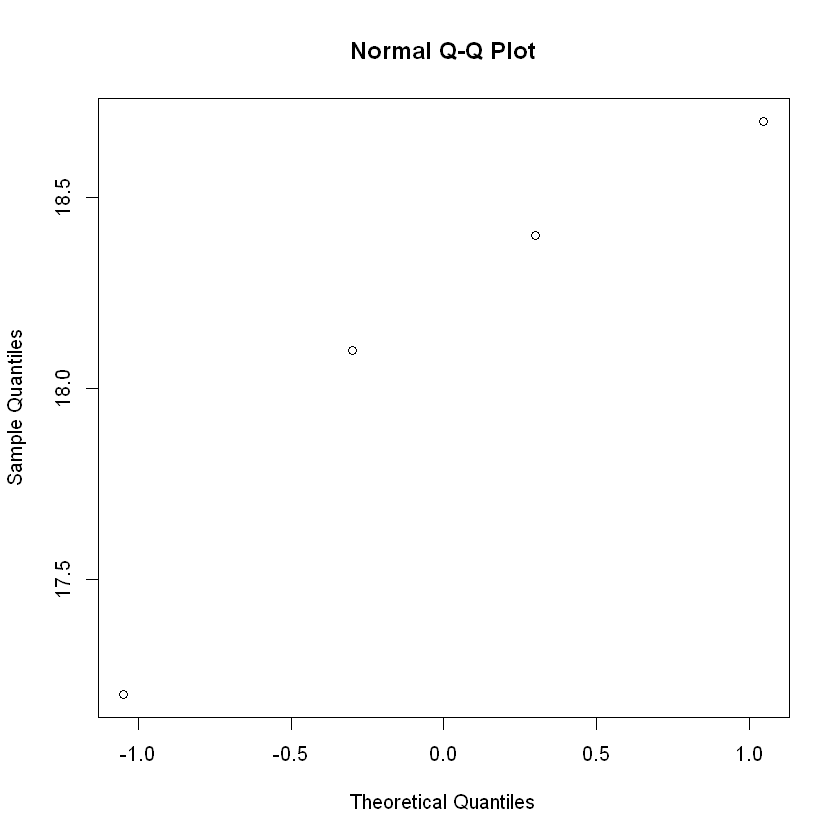

In [6]:
qqnorm(s1)
shapiro.test(s1)

qqnorm(s2)
shapiro.test(s2)

qqnorm(s3)
shapiro.test(s3)

qqnorm(s4)
shapiro.test(s4)

In [7]:
y=b[,1]
group=b[,2]

In [8]:
leveneTest(y, group=factor(group), center=mean) 

,Df,F value,Pr(>F)
group,3,0.09856344,0.9594151
,13,NA,NA



	Shapiro-Wilk normality test

data:  rr
W = 0.97058, p-value = 0.8286


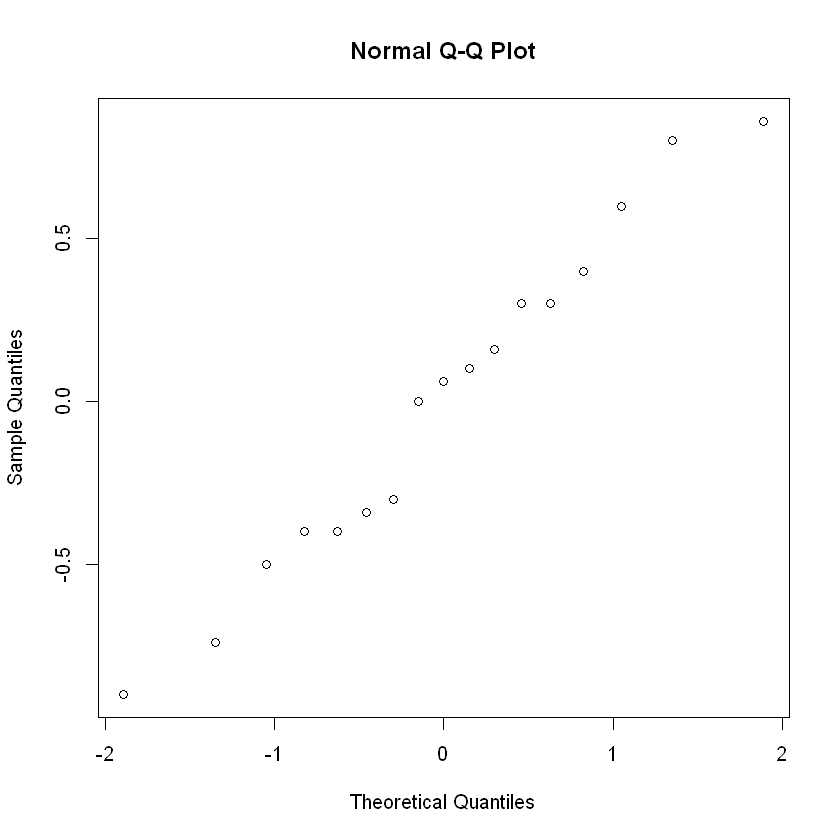

In [9]:
#normality, small sample size
rr=y-c(rep(mean(s1),4), rep(mean(s2),4),rep(mean(s3),5),rep(mean(s4),4))
shapiro.test(rr)
qqnorm(rr)

In [10]:
data = data.frame(y = y, group = factor(group))
z=aov(y ~ group, data=data)
summary(z)

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        3  74.80  24.934   76.23 1.67e-08 ***
Residuals   13   4.25   0.327                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [11]:
pairwise.t.test(y, group, p.adj = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  y and group 

  1       2       3   
2 0.64    -       -   
3 5.3e-06 5.9e-07 -   
4 5.3e-07 8.8e-08 0.16

P value adjustment method: bonferroni 

In [12]:
pairwise.t.test(y, group, p.adj = "holm")


	Pairwise comparisons using t tests with pooled SD 

data:  y and group 

  1       2       3    
2 0.107   -       -    
3 2.6e-06 4.4e-07 -    
4 4.4e-07 8.8e-08 0.053

P value adjustment method: holm 

In [13]:
TukeyHSD(z)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = y ~ group, data = data)

$group
     diff        lwr       upr     p adj
2-1 -0.70 -1.8869535 0.4869535 0.3477664
3-1  3.34  2.2139571 4.4660429 0.0000046
4-1  4.30  3.1130465 5.4869535 0.0000005
3-2  4.04  2.9139571 5.1660429 0.0000005
4-2  5.00  3.8130465 6.1869535 0.0000001
4-3  0.96 -0.1660429 2.0860429 0.1062452


In [ ]:
# differences between 
# 3 and 1
# 4 and 1
# 3 and 2
# 4 and 2